In [1]:
import os, shutil, pathlib
import torch
#torch 1.10.0
import pandas as pd

from torch import nn
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torch.utils.data import random_split

import numpy as np
import time

import matplotlib.pyplot as plt
#matplotlib 3.3.3
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#sklearn 0.23.2

In [2]:
casez = []
casez = np.append(casez,"W15.0")
# casez = np.append(casez,"W15.25")
# casez = np.append(casez,"W15.5")
# casez = np.append(casez,"W15.75")
# casez = np.append(casez,"W16.0")
# casez = np.append(casez,"W16.2")
# casez = np.append(casez,"W16.3")
# casez = np.append(casez,"W16.4")
# casez = np.append(casez,"W16.5")
# casez = np.append(casez,"W16.6")
# casez = np.append(casez,"W16.7")
# casez = np.append(casez,"W16.8")
# casez = np.append(casez,"W17.0")
# casez = np.append(casez,"W17.25")
# casez = np.append(casez,"W17.5")
# casez = np.append(casez,"W17.75")
casez = np.append(casez,"W18.0")

In [3]:
c = []
c = np.append(c,15)
# c = np.append(c,15.25)
# c = np.append(c,15.5)
# c = np.append(c,15.75)
# c = np.append(c,16)
# c = np.append(c,16.2)
# c = np.append(c,16.3)
# c = np.append(c,16.4)
# c = np.append(c,16.5)
# c = np.append(c,16.6)
# c = np.append(c,16.7)
# c = np.append(c,16.8)
# c = np.append(c,17)
# c = np.append(c,17.25)
# c = np.append(c,17.5)
# c = np.append(c,17.75)
c = np.append(c,18)

In [5]:
path = pathlib.Path("/home/physics/phubdf/Numerical_Data")
os.chdir(path)

if os.path.exists(f"{path}/labels"):
    shutil.rmtree(f"{path}/labels")
os.mkdir(f"{path}/labels")
for i in range(0,len(casez)):
    csv_input = pd.read_csv(f'{path}/{casez[i]}/labels.csv')
    csv_input.replace(to_replace=0,value=i,inplace = True)
    csv_input.to_csv(f'{path}/labels/labels{c[i]}.csv', index=False)


src = os.listdir(f'{path}/labels')
a = pd.concat([pd.read_csv(f'{path}/labels/{file}') for file in src ], ignore_index=True)
a.to_csv(f'{path}/labels/labels.csv', index=False)


In [6]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = np.loadtxt(f"{img_path}")
        image = np.square(image)
        image = image.reshape(1,30,30,30)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [7]:

batch_size = 32
for i in range(0,len(casez)):
    if i == 0:
        data = CustomImageDataset(annotations_file=f"{path}/labels/labels{c[i]}.csv",img_dir=f"{path}/{casez[i]}")
        training_data, validation_data, test_data = random_split(data,[1600*len(c),300*len(c),100*len(c)])
    else:
        data = CustomImageDataset(annotations_file=f"{path}/labels/labels{c[i]}.csv",img_dir=f"{path}/{casez[i]}")
        train_set, validation_set, test_set = random_split(data,[1600*len(c),300*len(c),100*len(c)]) 
        training_data = ConcatDataset([training_data,train_set])
        validation_data = ConcatDataset([validation_data,validation_set])
        test_data = ConcatDataset([test_data,test_set])
        

print(len(training_data))
print(len(validation_data))
print(len(test_data))



# Create data loaders.

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

800


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels
print(f"Label: {label}")

Feature batch shape: torch.Size([32, 1, 20, 20, 20])
tensor([[[[[1.4467e-04, 4.0340e-05, 6.9554e-09,  ..., 9.6781e-06,
            5.3520e-06, 1.3589e-04],
           [6.0174e-06, 1.0468e-04, 2.0221e-07,  ..., 7.8758e-07,
            7.9017e-07, 2.9537e-06],
           [2.1949e-04, 3.0204e-05, 6.8454e-09,  ..., 1.1918e-08,
            1.7251e-07, 7.4026e-06],
           ...,
           [1.4608e-06, 1.4026e-05, 4.2461e-05,  ..., 1.8149e-06,
            1.8076e-05, 4.5389e-06],
           [5.2393e-06, 9.0810e-06, 2.8577e-06,  ..., 2.0741e-07,
            7.1155e-07, 2.9065e-07],
           [1.1027e-05, 5.3476e-06, 1.3563e-04,  ..., 1.6493e-07,
            2.7969e-06, 1.0818e-06]],

          [[2.7138e-05, 2.8650e-05, 6.1999e-07,  ..., 4.5266e-06,
            4.1008e-06, 9.4382e-07],
           [6.6138e-06, 1.0629e-06, 6.3729e-05,  ..., 1.2900e-07,
            1.1399e-08, 2.2402e-06],
           [8.7750e-05, 1.3717e-05, 8.7841e-05,  ..., 1.1846e-06,
            9.5760e-08, 2.6456e-05],
  

In [9]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model = models.video.r3d_18()
model.stem[0] = nn.Conv3d(in_channels=1, out_channels=64, kernel_size=(3,7,7), stride=(1,2,2), padding=0, bias=False)
model.fc = nn.Linear(in_features=512,out_features=len(c),bias=True)
if torch.cuda.is_available():
    model.cuda()
print(model)

Using cpu device
NeuralNetwork(
  (cnn_layers): Sequential(
    (0): Conv3d(1, 16, kernel_size=(5, 5, 5), stride=(1, 1, 1), bias=False)
    (1): Conv3d(16, 16, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (2): ReLU()
    (3): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.5, inplace=False)
    (5): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), bias=False)
    (6): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (7): ReLU()
    (8): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.5, inplace=False)
    (10): Conv3d(32, 64, kernel_size=(2, 2, 2), stride=(1, 1, 1), bias=False)
    (11): Conv3d(64, 64, kernel_size=(2, 2, 2), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (12): ReLU()
    (13): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.5, inplace=False)


/warwick/desktop/2018/software/PyTorch/1.10.0-fosscuda-2020b/lib/python3.8/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [12]:
epochs = 10
min_valid_loss = np.inf
start = time.time()
tl = np.array([])
vl = np.array([])

for e in range(epochs):
    st = time.time()
    train_loss = 0.0
    model.train()     # Optional when not using Model Specific layer
    for data, labels in train_dataloader:
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        target = model(data.float())
        loss = loss_fn(target,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validation_dataloader:
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data.float())
        loss = loss_fn(target,labels)
        valid_loss = loss.item() * data.size(0)
    
    et = time.time()
    rt = et-st

    print(f'Epoch {e+1} \t Runtime: {round(rt,2)}s \t Training Loss: {train_loss / len(train_dataloader)} \t Validation Loss: {valid_loss / len(validation_dataloader)}')
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Saving State Dict
        torch.save(model.state_dict(), 'saved_model.pth')
    else:
        print("\n")
    
    tl = np.append(tl, train_loss / len(train_dataloader))
    vl = np.append(vl,valid_loss / len(validation_dataloader))

end = time.time()
total = end-start
print(f"Total runtime: {round(total,2)}s")

Epoch 1 	 Runtime: 29.54s 	 Training Loss: 0.6931475549936295 	 Validation Loss: 4.158893465995789
Validation Loss Decreased(inf--->16.635574) 	 Saving The Model
Epoch 2 	 Runtime: 25.37s 	 Training Loss: 0.6931476920843125 	 Validation Loss: 4.158893465995789


Epoch 3 	 Runtime: 24.59s 	 Training Loss: 0.6931493312120438 	 Validation Loss: 4.158893465995789


Epoch 4 	 Runtime: 25.37s 	 Training Loss: 0.6931474804878235 	 Validation Loss: 4.158893465995789


Epoch 5 	 Runtime: 25.55s 	 Training Loss: 0.6931484460830688 	 Validation Loss: 4.158893465995789


Epoch 6 	 Runtime: 25.39s 	 Training Loss: 0.6931506305932998 	 Validation Loss: 4.158893465995789


Epoch 7 	 Runtime: 26.18s 	 Training Loss: 0.6931486696004867 	 Validation Loss: 4.158893465995789


Epoch 8 	 Runtime: 25.74s 	 Training Loss: 0.6931490004062653 	 Validation Loss: 4.158893465995789


Epoch 9 	 Runtime: 27.26s 	 Training Loss: 0.693148210644722 	 Validation Loss: 4.158893465995789


Epoch 10 	 Runtime: 26.24s 	 Tr

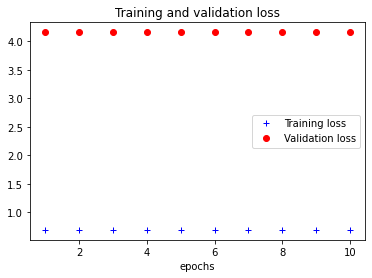

In [13]:
x = np.arange(0,epochs,1)
plt.plot(x+1, tl, "b+", label="Training loss")
np.savetxt(f"tl-C{len(c)}-D30-{datetime.now()}.csv", tl, delimiter=",")
plt.plot(x+1, vl, "ro", label="Validation loss")
np.savetxt(f"vl-C{len(c)}-D30-{datetime.now()}.csv", vl, delimiter=",")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [19]:
predict = []
p = []
model.eval()
for i in range(0,200*len(c)):
    x, y = test_data[i][0], test_data[i][1]
    x = x.reshape(1,1,30,30,30)
    x = torch.from_numpy(x)
    x = x.float()
    with torch.no_grad():
        pred = model (x.cuda()) if torch.cuda.is_available() else model(x)
        predicted, actual = pred[0].argmax(0), y 
        predicted = torch.Tensor.cpu(predicted)
        predict = np.append(predict, predicted)
        p = np.append(p, actual)
      



tensor([9.5105e-06, 7.6914e-06])
tensor([2.4702e-05, 1.7613e-05])
tensor([4.7042e-06, 2.8522e-06])
tensor([1.0654e-05, 1.2318e-05])
tensor([1.6161e-05, 2.0457e-05])
tensor([1.1208e-05, 1.1639e-05])
tensor([2.1079e-05, 1.7809e-05])
tensor([1.9746e-05, 1.4816e-05])
tensor([1.0252e-05, 8.2740e-06])
tensor([1.0524e-05, 7.8355e-06])
tensor([8.3278e-06, 6.2158e-06])
tensor([1.0166e-05, 7.9963e-06])
tensor([8.5546e-05, 7.4075e-05])
tensor([1.5866e-05, 1.7919e-05])
tensor([2.2058e-05, 1.7557e-05])
tensor([3.4520e-05, 1.2773e-05])
tensor([1.7185e-05, 1.2559e-05])
tensor([1.0305e-04, 8.5126e-05])
tensor([1.3262e-05, 1.1069e-05])
tensor([1.8819e-05, 1.6295e-05])
tensor([8.7789e-06, 6.9366e-06])
tensor([3.5525e-05, 2.8619e-05])
tensor([1.9903e-05, 2.1425e-05])
tensor([1.9288e-05, 6.2523e-06])
tensor([1.6531e-05, 1.0941e-05])
tensor([3.5713e-05, 1.4928e-05])
tensor([6.0240e-05, 5.1760e-05])
tensor([2.0998e-05, 1.5470e-05])
tensor([7.2227e-06, 6.5764e-06])
tensor([1.8386e-05, 1.4647e-05])
tensor([2.

In [15]:
cm = confusion_matrix(p, predict)
print(cm)
np.savetxt("cm.csv", cm, delimiter=",")
score = round(accuracy_score(p, predict)*100,2)
print(f"Model Accuracy: {score}%")

[[20  2]
 [15  3]]
Model Accuracy: 57.5%
